In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/raw/crime.csv')
print(df.head())
print(df.isnull().sum())
print(df.duplicated().sum())

  Sl. No. Col. (1)                                Crime Head Col. (2)  \
0                1                                             Murder   
1                2          Culpable Homicide not amounting to Murder   
2                3                        Causing Death by Negligence   
3              3.1  Deaths due to Negligence relating to Road Acci...   
4            3.1.1                                        Hit and Run   

   Cases Pending Investigation from Previous Year - Col. (3)  \
0                                              22198           
1                                               1810           
2                                              58321           
3                                              53130           
4                                              13564           

   Cases Reported during the year - Col. (4)  \
0                                      29272   
1                                       3807   
2                               

In [30]:
print(df.info())
total_cases = df['Total Cases for Investigation (Col.3+Col.4+Col.5) - Col. (6)']
print(total_cases.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 24 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Sl. No. Col. (1)                                                                         142 non-null    object 
 1   Crime Head Col. (2)                                                                      142 non-null    object 
 2   Cases Pending Investigation from Previous Year - Col. (3)                                142 non-null    int64  
 3   Cases Reported during the year - Col. (4)                                                142 non-null    int64  
 4   Cases Reopened for Investigation - Col. (5)                                              142 non-null    int64  
 5   Total Cases for Investigation (Col.3+Col.4+Col.5) - Col. (6)    

In [8]:
Total_Cases = df['Total Cases for Investigation (Col.3+Col.4+Col.5) - Col. (6)']
Total_Cases.head()

0     51540
1      5650
2    204764
3    190799
4     57074
Name: Total Cases for Investigation (Col.3+Col.4+Col.5) - Col. (6), dtype: int64

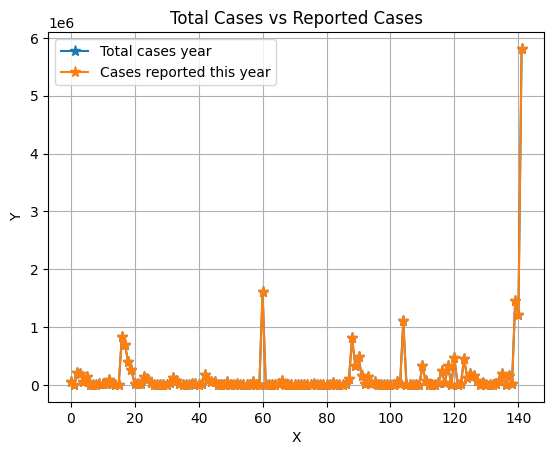

In [12]:
import matplotlib.pyplot as plt
plt.plot(total_cases, label="Total cases year", marker='*', markersize=8)
plt.plot(Total_Cases, label="Cases reported this year", marker='*', markersize=8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Total Cases vs Reported Cases")
plt.grid()
plt.legend()
plt.show()

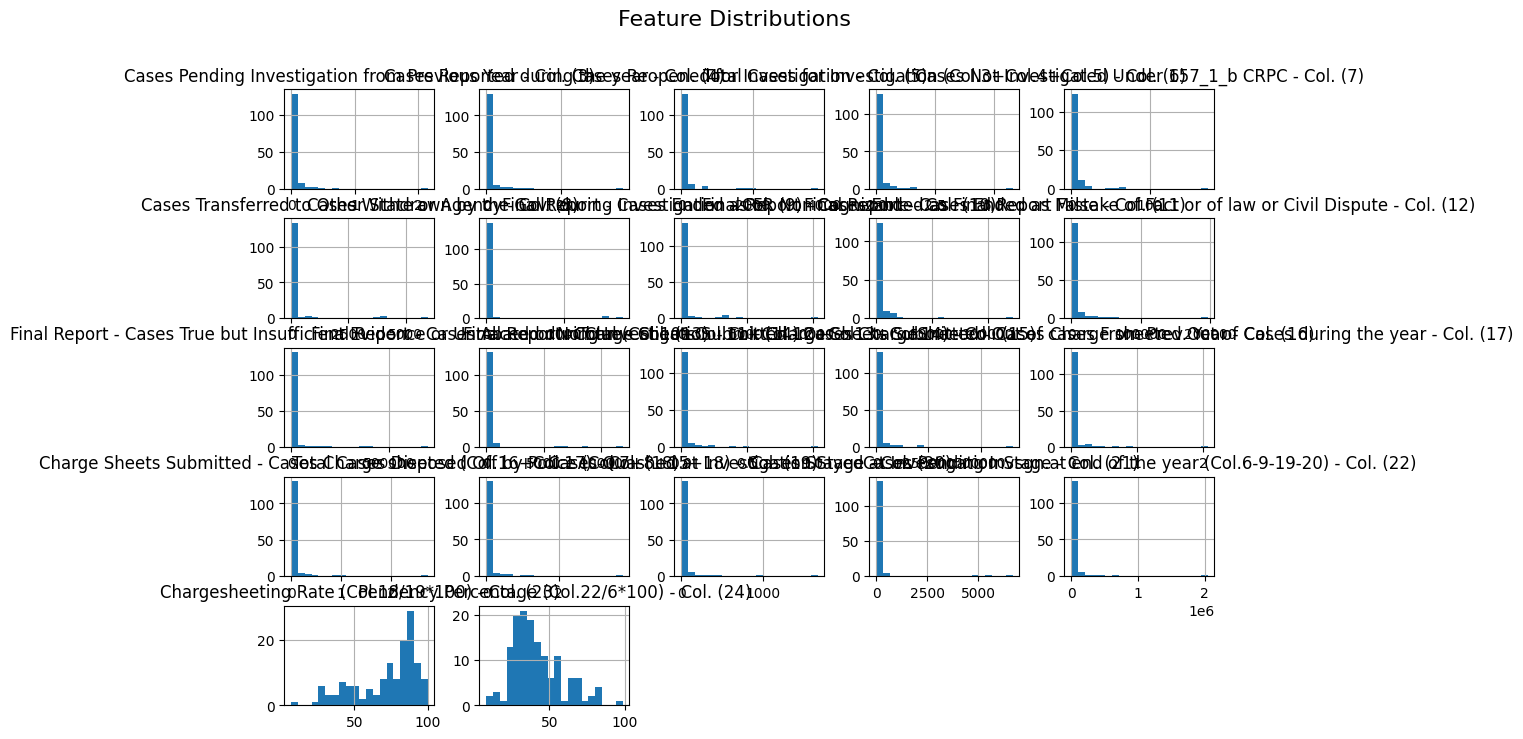

In [13]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

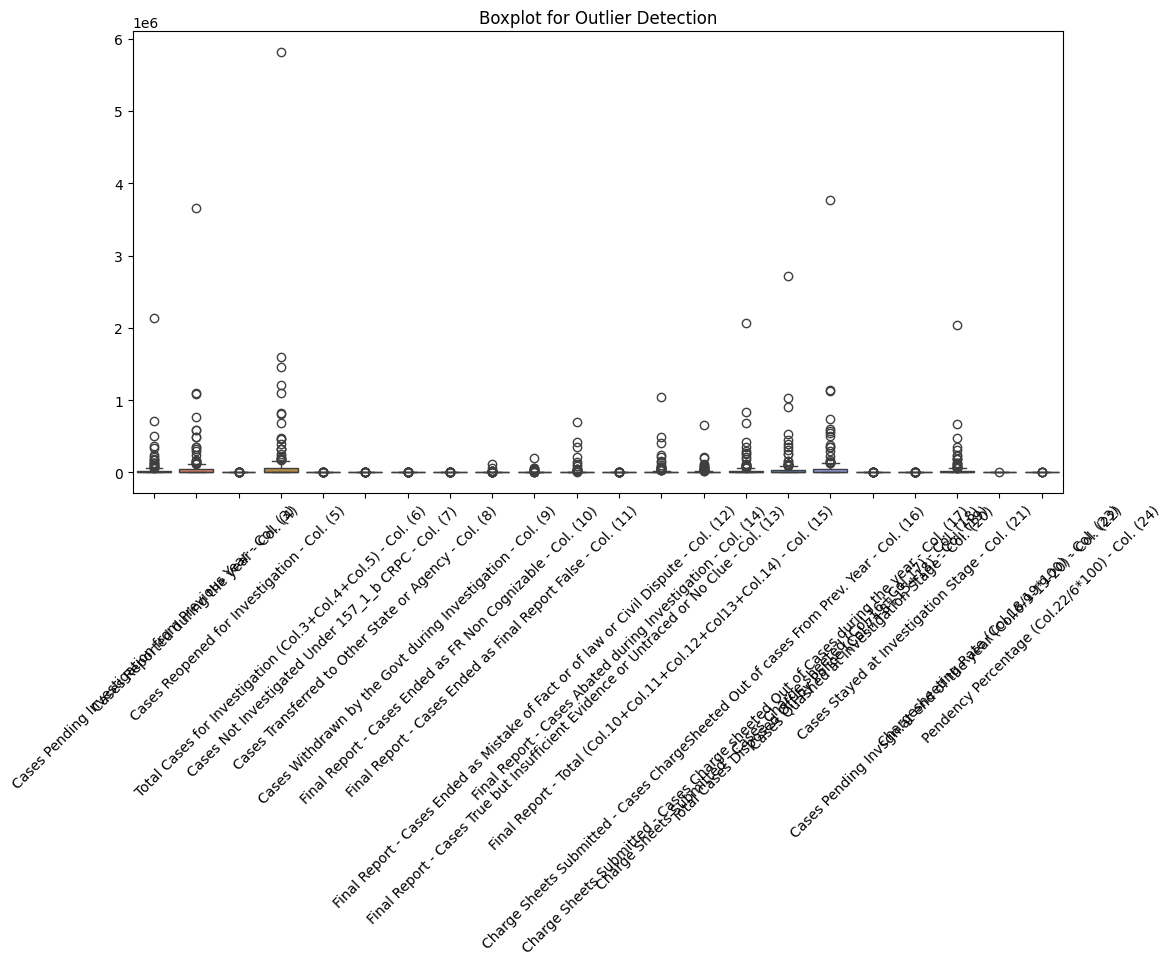

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

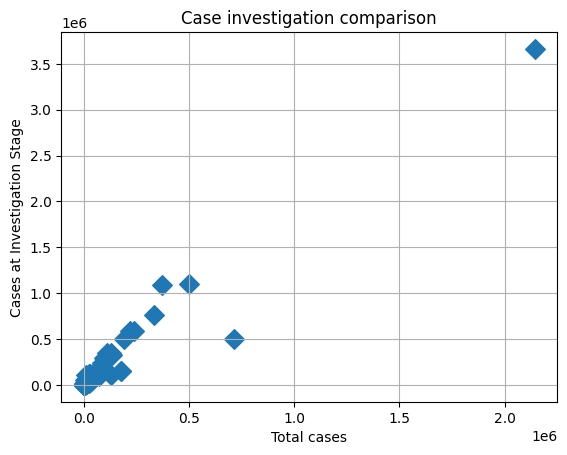

In [17]:
plt.scatter(df['Cases Pending Investigation from Previous Year - Col. (3)'], df['Cases Reported during the year - Col. (4)'], marker='D', s=100)
plt.xlabel("Total cases")
plt.ylabel("Cases at Investigation Stage")
plt.title("Case investigation comparison")
plt.grid()

plt.show()

In [18]:
df.columns

Index(['Sl. No. Col. (1)', 'Crime Head Col. (2)',
       'Cases Pending Investigation from Previous Year - Col. (3)',
       'Cases Reported during the year - Col. (4)',
       'Cases Reopened for Investigation - Col. (5)',
       'Total Cases for Investigation (Col.3+Col.4+Col.5) - Col. (6)',
       'Cases Not Investigated Under 157_1_b CRPC - Col. (7)',
       'Cases Transferred to Other State or Agency - Col. (8)',
       'Cases Withdrawn by the Govt during Investigation - Col. (9)',
       'Final Report - Cases Ended as FR Non Cognizable - Col. (10)',
       'Final Report - Cases Ended as Final Report False - Col. (11)',
       'Final Report - Cases Ended as Mistake of Fact or of law or Civil Dispute - Col. (12)',
       'Final Report - Cases True but Insufficient Evidence or Untraced or No Clue - Col. (13)',
       'Final Report - Cases Abated during Investigation - Col. (14)',
       'Final Report - Total (Col.10+Col.11+Col.12+Col13+Col.14) - Col. (15)',
       'Charge Sheets Sub

Mean Absolute Error (MAE): 11.88
Mean Squared Error (MSE): 263.12
R² Score: 0.10


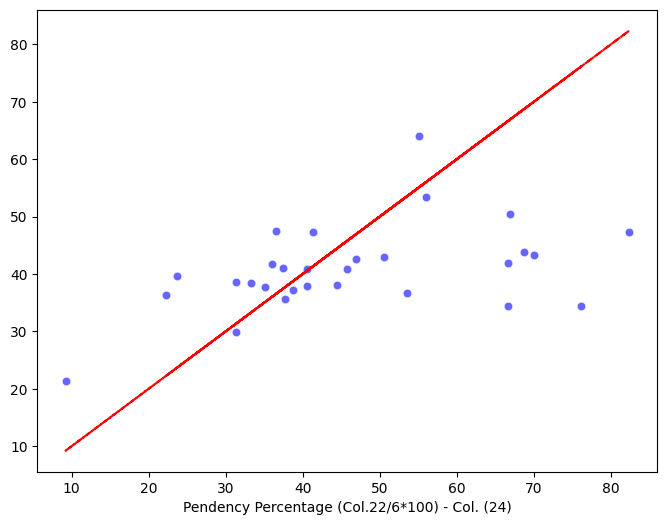

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
features = [
   'Cases Pending Investigation from Previous Year - Col. (3)',
       'Cases Reported during the year - Col. (4)',
       'Cases Reopened for Investigation - Col. (5)',
       'Total Cases for Investigation (Col.3+Col.4+Col.5) - Col. (6)',
       'Cases Not Investigated Under 157_1_b CRPC - Col. (7)',
       'Cases Transferred to Other State or Agency - Col. (8)',
       'Cases Withdrawn by the Govt during Investigation - Col. (9)',
       'Final Report - Cases Ended as FR Non Cognizable - Col. (10)',
       'Charge Sheets Submitted - Cases ChargeSheeted Out of cases From Prev. Year - Col. (16)',
       'Charge Sheets Submitted - Cases Charge sheeted Out of Cases during the year - Col. (17)',
       'Charge Sheets Submitted - Cases Charge sheeted (Col.16+Col.17) - Col. (18)',
       'Total Cases Disposed Off by Police (Col.7+8+15+18) - Col. (19)',
       'Cases Quashed at Investigation Stage - Col. (20)',
       'Cases Stayed at Investigation Stage - Col. (21)',
       'Cases Pending Invsgn.at end of the year (Col.6-9-19-20) - Col. (22)',
       'Chargesheeting Rate (Col.18/19*100) - Col. (23)'
]
target = "Pendency Percentage (Col.22/6*100) - Col. (24)"
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot(y_test, y_test, color="red", linestyle="--")  
plt.show()